<a href="https://colab.research.google.com/github/HoPhuocMinhQuan20104052/HoPhuocMinhQuan/blob/main/Nhandienmat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
train_set=train_data.flow_from_directory('/content/drive/MyDrive/Nhandienmat/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 120 images belonging to 3 classes.


In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import layers
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3),padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 38, 38, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 38, 38, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 19, 19, 128)     

In [ ]:
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])
model.fit(train_set, epochs=10, batch_size=128,verbose=1)

Epoch 1/10
4/4 [==============================] - 10s 2s/step - loss: 4.3725 - accuracy: 0.4167
Epoch 2/10
4/4 [==============================] - 8s 2s/step - loss: 1.0493 - accuracy: 0.5333
Epoch 3/10
4/4 [==============================] - 8s 2s/step - loss: 0.6003 - accuracy: 0.7417
Epoch 4/10
4/4 [==============================] - 8s 2s/step - loss: 0.5596 - accuracy: 0.7250
Epoch 5/10
4/4 [==============================] - 8s 2s/step - loss: 0.3056 - accuracy: 0.8250
Epoch 6/10
4/4 [==============================] - 8s 2s/step - loss: 0.0269 - accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 9s 2s/step - loss: 0.0495 - accuracy: 0.9917
Epoch 8/10
4/4 [==============================] - 7s 2s/step - loss: 0.0073 - accuracy: 1.0000
Epoch 9/10
4/4 [==============================] - 7s 2s/step - loss: 0.0082 - accuracy: 1.0000
Epoch 10/10
4/4 [==============================] - 7s 2s/step - loss: 0.0017 - accuracy: 1.0000


In [ ]:
model.save("Nhan_dien_mat.h5")

In [ ]:
from keras.models import load_model
model_face=load_model('Nhan_dien_mat.h5')

1/1 [==============================] - 0s 18ms/step
Đây là : Quan


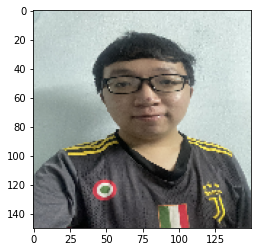

In [ ]:
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
img = load_img('/content/drive/MyDrive/Nhandienmat/Test/z3862057111043_a953dfb9e6075556f4c92d4e3273f938.jpg',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_face.predict(img)
class_name=['Manh','Quan','Tai']
m= int(np.argmax(result,axis=1))
print("Đây là :", class_name[m])